# Data Preprocessing Notebook
This notebook focuses on cleaning, preprocessing, and preparing the dataset for modeling.   
Additionally, exploratory data analysis (EDA) is performed using Pandas.

### Inicialize Spark

In [18]:
# spark

### Import libraries

In [19]:
from src.data_preprocessing import DataPreprocessor
from src.historical_data_viz import HistoricalDataVisualizer
import pandas as pd

### Load data

In [20]:
df_offers = spark.read.json('~/ifood_case/data/offers.json')
df_transactions = spark.read.json('~/ifood_case/data/transactions.json')
df_profile = spark.read.json('~/ifood_case/data/profile.json')

NameError: name 'spark' is not defined

### Use **DataPreprocessor** class to preprocess the data

In [ ]:
df_processing = DataPreprocessor(df_profile, df_transactions)
df_procesed, df_model = df_processing.transform()

### Save processed data

In [ ]:
df_procesed.repartition(1).write.mode("overwrite").parquet('~/ifood_case/data/df_all.parquet')
df_model.repartition(1).write.mode("overwrite").parquet('~/ifood_case/data/df_model.parquet')

### Read the processed data as Pandas DataFrames
This step is required for plotting.

In [ ]:
df_procesed = pd.read_parquet('~/ifood_case/data/processed/df_all.parquet')
df_model = pd.read_parquet('~/ifood_case/data/processed/df_model.parquet')

### Use **HistoricalDataVisualizer** class to generate data exploration visualizations

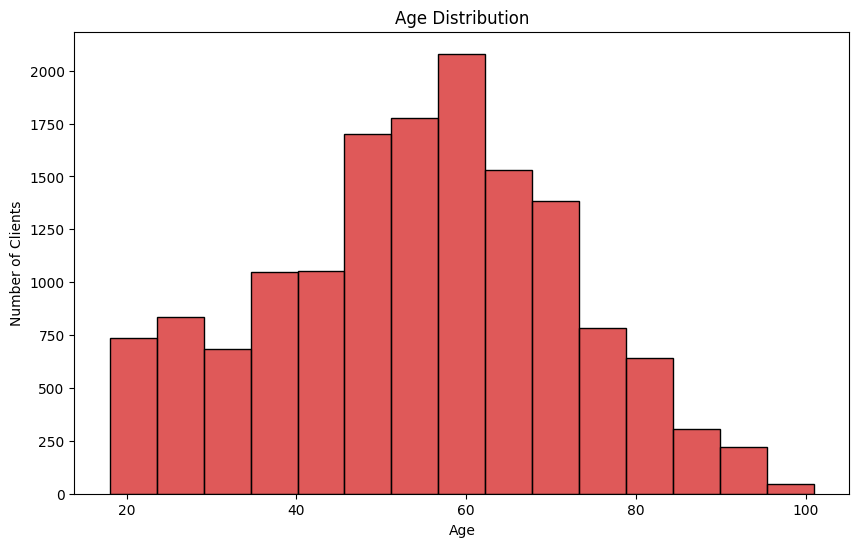

/home/ester/Documents/Gitlab/Case_ifood/ifood_case/src/historical_data_viz.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_cliente_stats, palette='Reds')


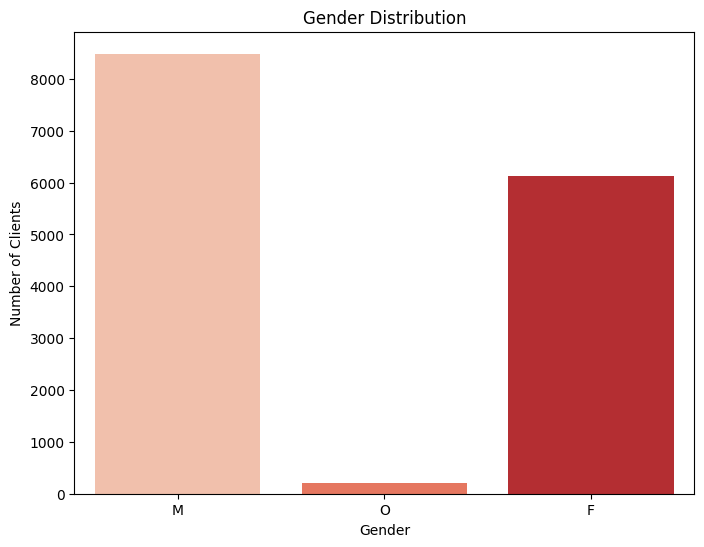

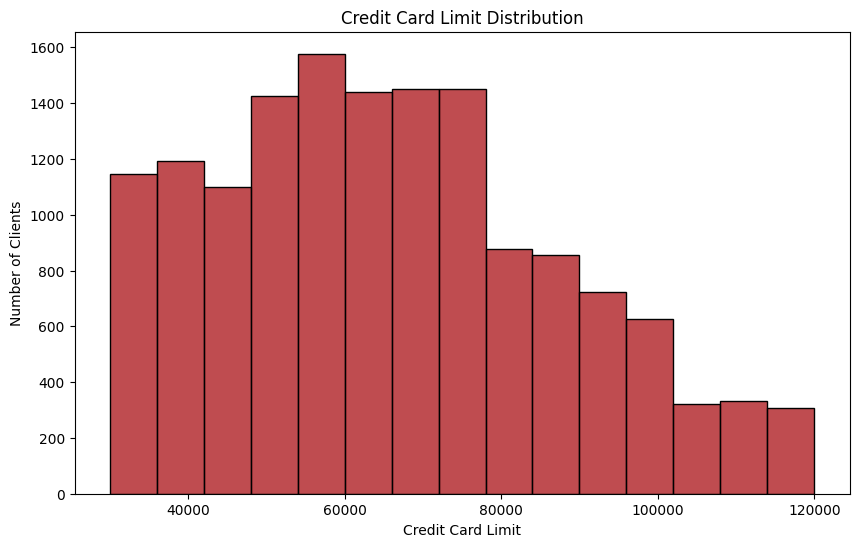

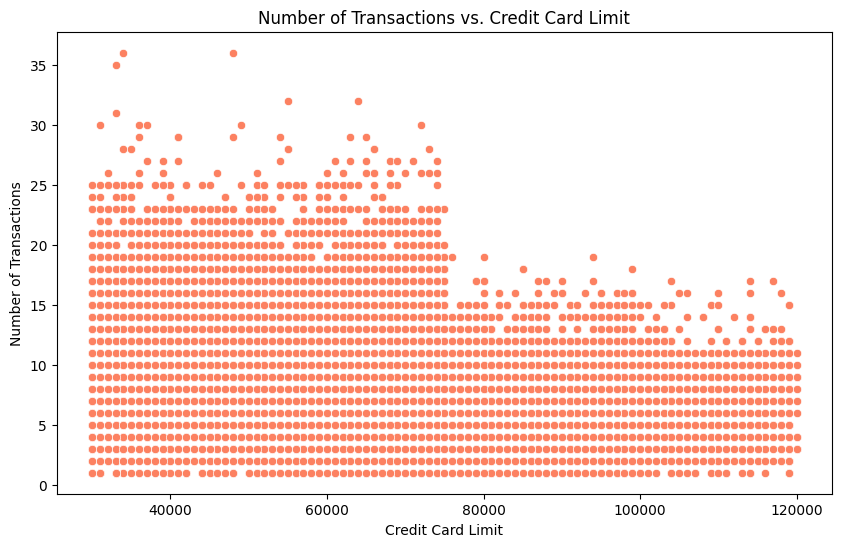

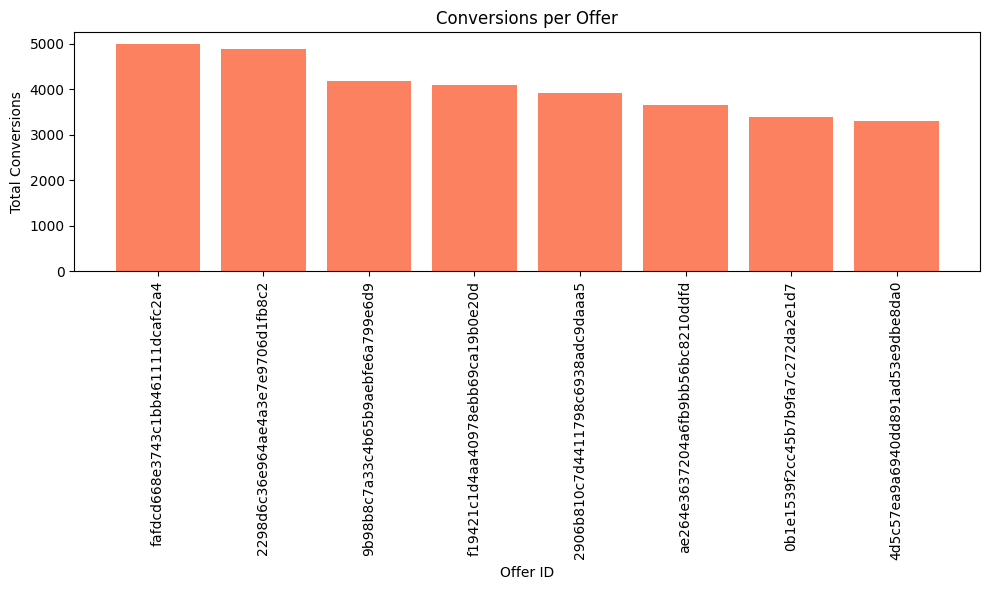

/home/ester/Documents/Gitlab/Case_ifood/ifood_case/src/historical_data_viz.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['id'] = df_plot['account_id'].astype(str) + "/" + df_plot['offer_id'].astype(str)


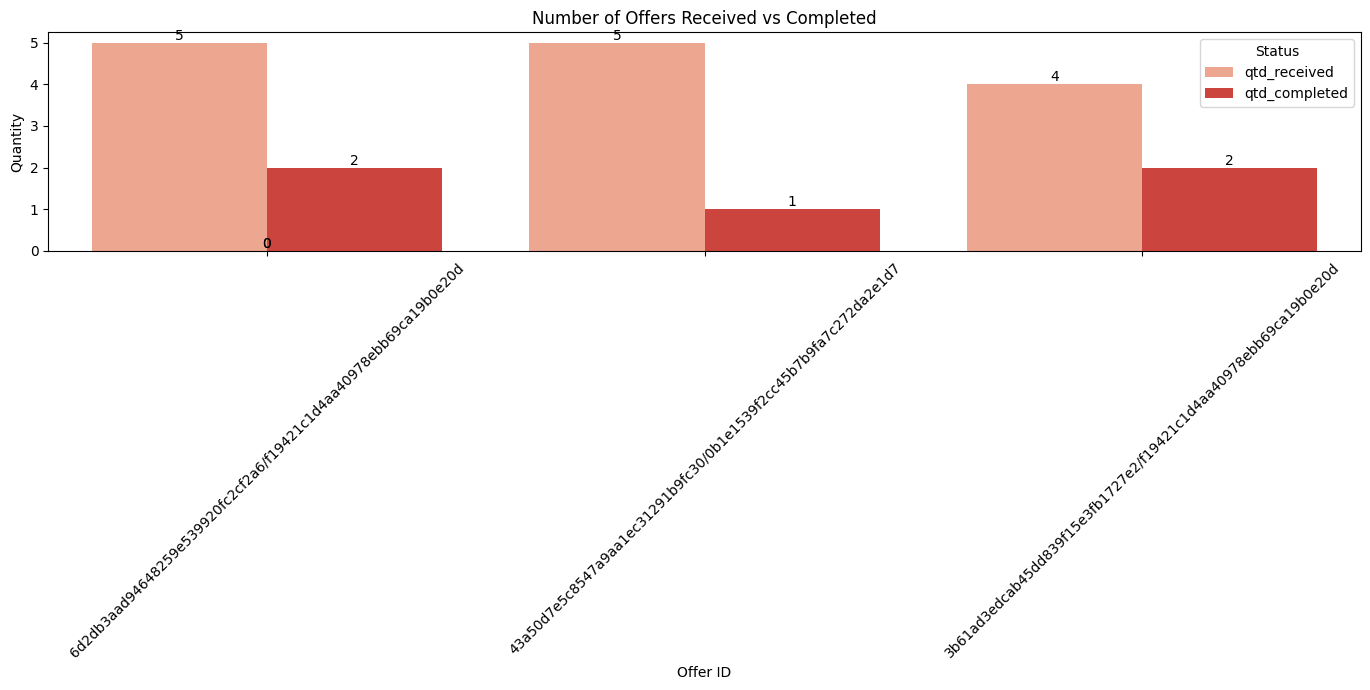

/home/ester/Documents/Gitlab/Case_ifood/ifood_case/src/historical_data_viz.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=offer_counts.index, y=offer_counts.values, palette='Reds')


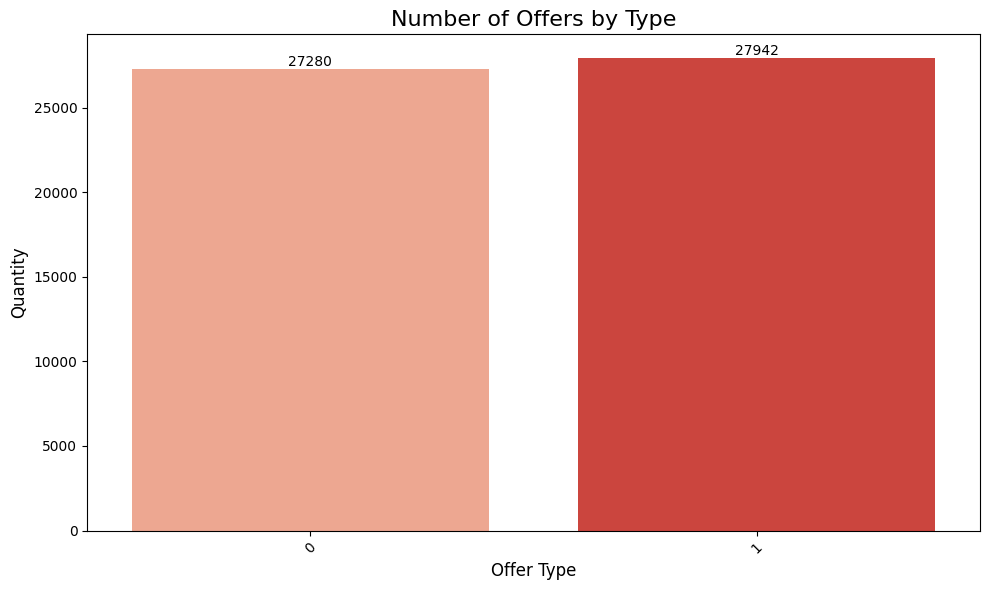

In [ ]:
viz = HistoricalDataVisualizer(df_procesed,df_model)
viz.plot_historical_data()